In [9]:
package UnmannedGroundVehicle_LogicalArchitecture {
        
    import SI::*;
    
    abstract part def Container {
        abstract ref RoughValue : Base::Anything;
        abstract ref IcyValue : Base::Anything;
    }

    attribute def Terrain {
        roughness : LengthValue;
        iciness : LengthValue;
    }
        
    part def NavigationSystem {
        attribute desiredTerrain : Terrain {
            attribute roughness : LengthValue;
            attribute icyness: LengthValue;
        }        
    }
        
    part def UGV {
        part navigationSystem : NavigationSystem;
        attribute missionTime : DurationValue;
        attribute lifetimeCycles : LengthValue;
    }
    
    // Instantiate UGV with specific mission requirements
    // define specificUGV : UGV {
       // attribute redefines missionTime = 5 [hr];
        //attribute redefines lifetimeCycles = 100 [cycles];
    //}
}

Package UnmannedGroundVehicle_LogicalArchitecture (e9202d13-0806-4004-8b05-68fa37335631)


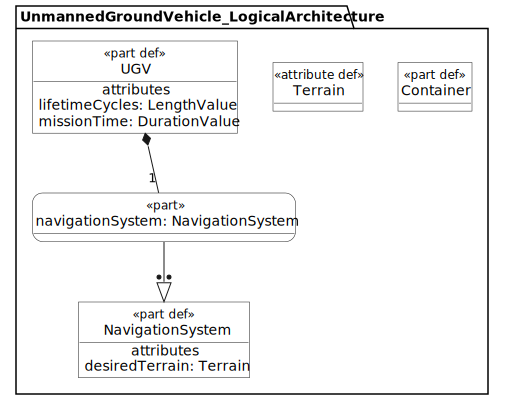

In [10]:
%viz --view=tree  UnmannedGroundVehicle_LogicalArchitecture

In [ ]:
/* Structured output 

package UnmannedGroundVehicle_LogicalArchitecture {
        
    import SI::*;
        
    attribute def Terrain {
        roughness : RoughnessValue;
        iciness : IceValue;
    }
        
    part def NavigationSystem {
        attribute desiredTerrain : Terrain {
            :>> roughness := Rough;
            :>> iciness := Icy;
        }        
    }
        
    part def UGV {
        part navigationSystem : NavigationSystem;
        attribute missionTime : DurationValue;
        attribute lifetimeCycles : CountValue;
    }
    
    // Instantiate UGV with specific mission requirements
    define specificUGV : UGV {
        attribute redefines missionTime = 5 [hr];
        attribute redefines lifetimeCycles = 100 [cycles];
    }
}
*/

In [ ]:
package Flashlight {
	
	attribute def OnOffCmd;
	attribute def Light;
	
	port def OnOffCmdPort {
		out onOffCmd : OnOffCmd;
	}
	
	port def LightPort {
		out light: Light;
	}
	
	part context {
		part user {
			port onOffCmdPort: OnOffCmdPort;
			perform illuminateRegion.sendOnOffCmd {
				out onOffCmd = onOffCmdPort.onOffCmd;
			}
		}
		
		interface userToFlashlight connect user.onOffCmdPort to flashlight.onOffCmdPort {
			ref flow references illuminateRegion.onOffCmdFlow
				from source.onOffCmd to target.onOffCmd; 
		}
		
		part flashlight {
			port onOffCmdPort: ~OnOffCmdPort;
			
			perform illuminateRegion.produceDirectedLight {
				in onOffCmd = onOffCmdPort.onOffCmd;
				out light = lightPort.light;
			}
			
			port lightPort: LightPort ;
		}
		part reflectingSource {
			port lightPort: ~LightPort;
			
			perform illuminateRegion.reflectLight {
				in light = lightPort.light;
			}
		}
	}
	
	action illuminateRegion {
		action sendOnOffCmd { out onOffCmd: OnOffCmd; }
		
		succession flow onOffCmdFlow from sendOnOffCmd.onOffCmd to produceDirectedLight.onOffCmd;
		
		action produceDirectedLight { in onOffCmd; out light: Light; }
		
		succession flow lightFlow from produceDirectedLight.light to reflectLight.light;
		
		action reflectLight { in light: Light; }
	}
	
	
	
}

In [ ]:
%viz --view=bl Flashlight